# Mapping Santorini Board Game
Our Goal is to map the current state of image of Santorini Board Game 

### First Step is to run the Canny Edge Detector

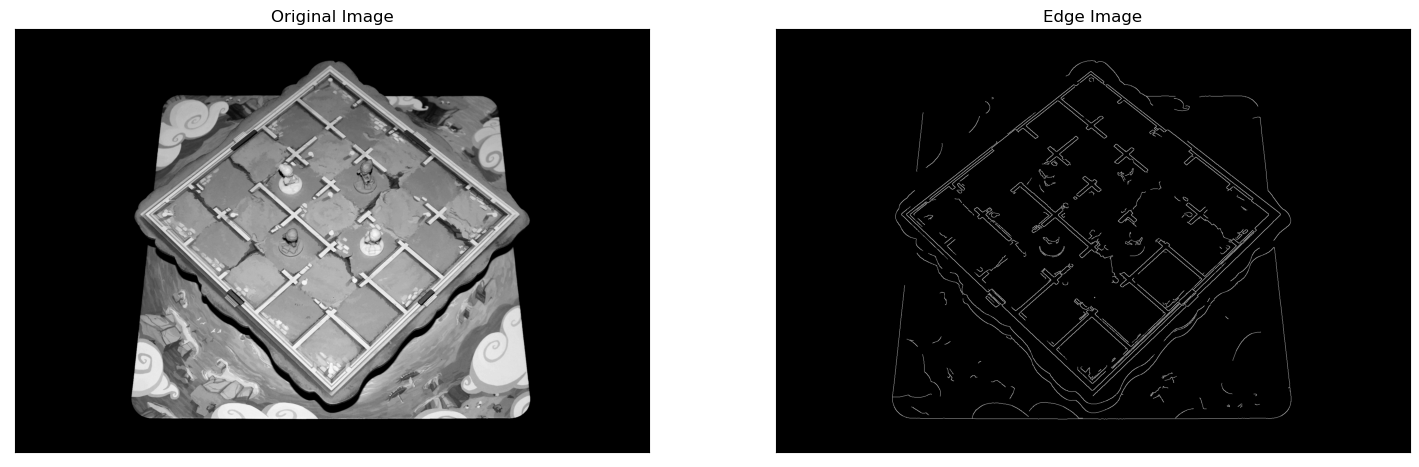

In [181]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('data/board.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, 'file could not be read, check with os.path.exists()'
edges = cv.Canny(img,500,250)
 
plt.figure(figsize=(18,18))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

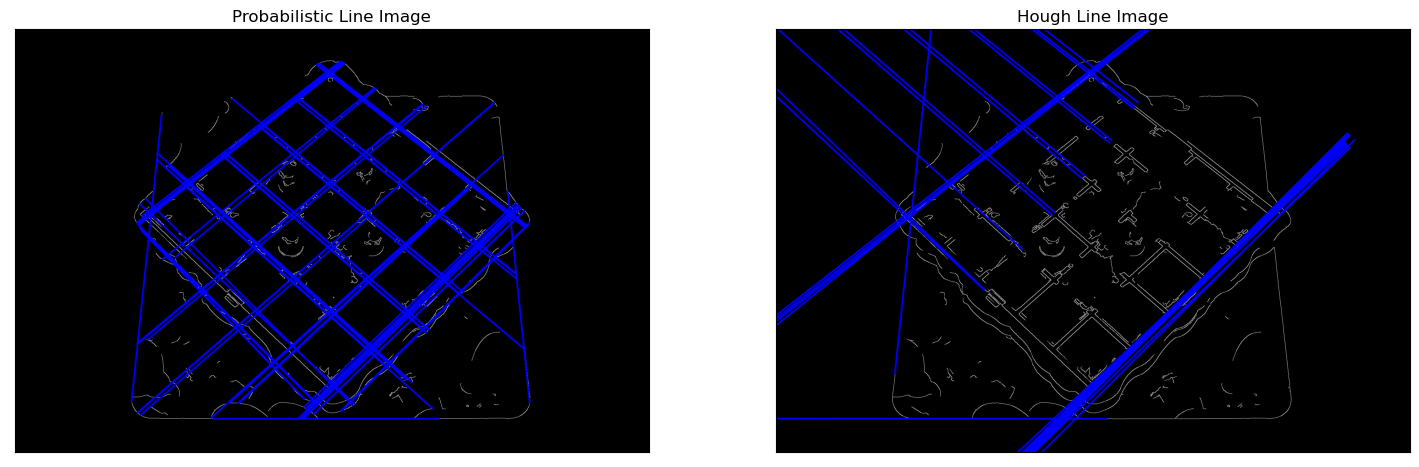

In [182]:
import math

 # Copy edges to the images that will display the results in BGR
houghLines = cv.cvtColor(edges, cv.COLOR_GRAY2BGR)
houghLinesProb = np.copy(houghLines)

lines = cv.HoughLines(edges, 1, np.pi / 180, 200, None, 0, 0)
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(houghLines, pt1, pt2, (0, 0, 255), 3, cv.LINE_AA)
        
            
linesP = cv.HoughLinesP(edges, 1, np.pi / 180, 100, None, 500, 200)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(houghLinesProb, (l[0], l[1]), (l[2], l[3]), (0, 0, 255), 3, cv.LINE_AA)


plt.figure(figsize=(18,18))
plt.subplot(121),plt.imshow(houghLinesProb,cmap = 'gray')
plt.title('Probabilistic Line Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(houghLines, cmap ='gray')
plt.title('Hough Line Image'), plt.xticks([]), plt.yticks([])

plt.show()

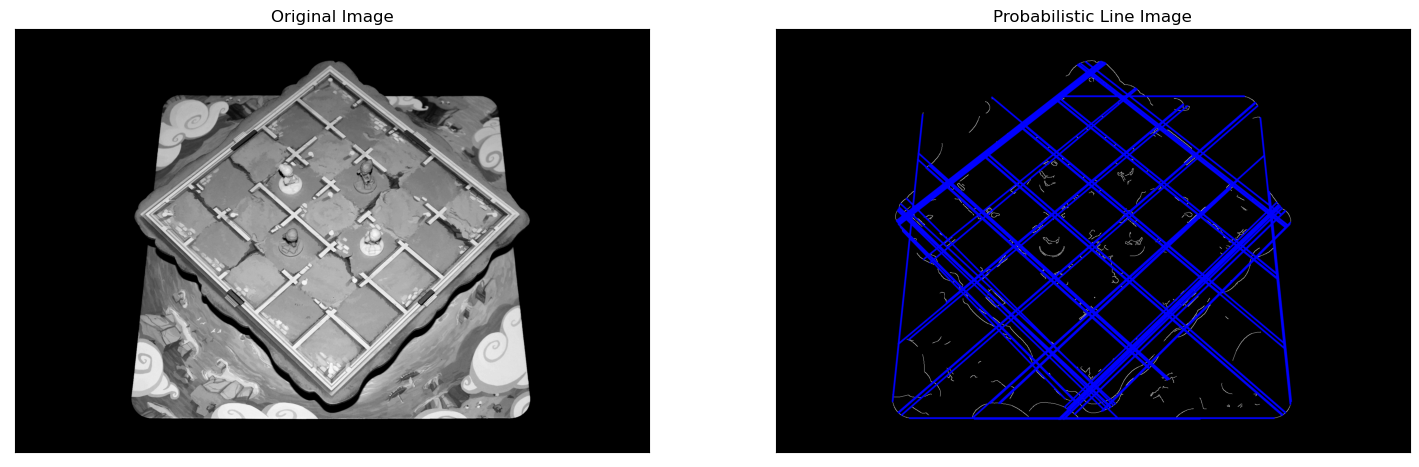

In [183]:
houghLinesProb = cv.cvtColor(edges, cv.COLOR_GRAY2BGR)

linesP = cv.HoughLinesP(edges, 1, np.pi / 180, 100, None, 500, 600)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(houghLinesProb, (l[0], l[1]), (l[2], l[3]), (0, 0, 255), 3, cv.LINE_AA)

plt.figure(figsize=(18,18))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(houghLinesProb, cmap ='gray')
plt.title('Probabilistic Line Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [184]:
print(len(linesP))
print(linesP)

84
[[[ 599 1179 1282 1179]]

 [[ 902 1165 1540  549]]

 [[ 950  128 1548  595]]

 [[ 868 1180 1529  542]]

 [[ 855 1180 1523  535]]

 [[ 860 1180 1525  537]]

 [[ 352 1127  443  258]]

 [[ 935   98 1525  559]]

 [[ 881 1150 1521  532]]

 [[ 870 1180 1530  542]]

 [[ 881 1149 1520  532]]

 [[ 369  545 1011 1144]]

 [[ 372  592  997  104]]

 [[ 365  581  984   98]]

 [[ 742  284 1539  953]]

 [[ 372  539 1036 1180]]

 [[ 623  379 1531 1168]]

 [[ 913  106 1544  599]]

 [[ 911  108 1542  601]]

 [[ 853  206 1515  742]]

 [[ 369  587  992  101]]

 [[ 919  103 1549  595]]

 [[ 858 1180 1524  537]]

 [[ 733  291 1541  969]]

 [[ 632  372 1540 1161]]

 [[ 633  371 1540 1160]]

 [[ 369  546 1011 1145]]

 [[ 950  137 1542  600]]

 [[ 845  212 1517  756]]

 [[1491  492 1557 1127]]

 [[ 624  378 1532 1167]]

 [[ 368  585  953  128]]

 [[ 370 1161 1450  223]]

 [[ 853  205 1515  741]]

 [[ 371  591  995  103]]

 [[ 367  549  993 1153]]

 [[ 845  211 1517  755]]

 [[ 379 1168 1456  232]]

 [[ 463  

In [185]:
def get_m(y_a, y_b, x_a, x_b):
    return (y_a - y_b) / (x_a - x_b)

def get_b(y_a, x_a, m):
    return y_a - (m * x_a)

# Obtain the angular coefficient and the linear coefficient
def get_equation(p):
    y_a, y_b, x_a, x_b = p[0][1], p[0][3], p[0][0], p[0][2]
    m = get_m(y_a, y_b, x_a, x_b)
    b = get_b(y_a, x_a, m)
    return m, b

ang_lin_list = list(map(get_equation, linesP))
for ang_lin in ang_lin_list:
    print(ang_lin)

(-0.0, 1179.0)
(-0.9655172413793104, 2035.8965517241381)
(0.7809364548494984, -613.8896321070234)
(-0.9652042360060514, 2017.7972768532527)
(-0.9655688622754491, 2005.561377245509)
(-0.9669172932330827, 2011.548872180451)
(-9.54945054945055, 4488.406593406593)
(0.7813559322033898, -632.5677966101695)
(-0.965625, 2000.7156249999998)
(-0.9666666666666667, 2021.0)
(-0.9655712050078247, 1999.6682316118936)
(0.9330218068535826, 200.71495327102804)
(-0.7808, 882.4576)
(-0.7802907915993538, 865.8061389337641)
(0.8393977415307403, -338.83312421580933)
(0.9653614457831325, 179.8855421686747)
(0.8689427312775331, -162.35132158590307)
(0.7812995245641838, -607.3264659270999)
(0.7812995245641838, -603.7638668779715)
(0.8096676737160121, -484.6465256797584)
(-0.7800963081861958, 874.8555377207063)
(0.780952380952381, -614.6952380952381)
(-0.9654654654654654, 2008.3693693693695)
(0.8391089108910891, -324.0668316831683)
(0.8689427312775331, -177.17180616740086)
(0.8699007717750827, -179.6471885336274

In [186]:
groups = []
for i in range(0, len(ang_lin_list)):
    angular, linear = ang_lin_list[i]
    found = False
    for group in groups:
        if abs(group['avg']['ang'] - angular) < 0.1 and abs(group['avg']['lin'] - linear) < 50:
            group['ang'].append(angular)
            group['lin'].append(linear)
            group['indexes'].append(i)
            group['avg']['ang'] = sum(group['ang']) / len(group['ang'])
            group['avg']['lin'] = sum(group['lin']) / len(group['lin'])
            found = True
            break
    if not found:
        groups.append({ 'avg': { 'ang': angular, 'lin': linear }, 'ang': [angular], 'lin': [linear], 'indexes': [i] })

indexes = []
for group in groups:
    indexes.append(group['indexes'][0])
print(len(groups))

21


In [204]:
p = []
for i in range(0, len(groups)):
    angI = groups[i]['avg']['ang']
    for f in range(0, len(groups)):
        angF = groups[f]['avg']['ang']
        print(abs(angI * angF +1) < 0.3, '\t | \t', angI, '*', angF,'=', angI * angF)

False 	 | 	 0.0 * 0.0 = 0.0
False 	 | 	 0.0 * -0.9657302873699887 = -0.0
False 	 | 	 0.0 * 0.7813230686213718 = 0.0
False 	 | 	 0.0 * -9.54945054945055 = -0.0
False 	 | 	 0.0 * 0.9661589855172156 = 0.0
False 	 | 	 0.0 * -0.7810129958340629 = -0.0
False 	 | 	 0.0 * 0.8391855769813166 = 0.0
False 	 | 	 0.0 * 0.8691343393770431 = 0.0
False 	 | 	 0.0 * 0.8096379603093016 = 0.0
False 	 | 	 0.0 * 9.621212121212121 = 0.0
False 	 | 	 0.0 * -0.8689742486998363 = -0.0
False 	 | 	 0.0 * 0.9001205959943662 = 0.0
False 	 | 	 0.0 * -0.9112611234284597 = -0.0
False 	 | 	 0.0 * 9.527472527472527 = 0.0
False 	 | 	 0.0 * -1.0 = -0.0
False 	 | 	 0.0 * -0.9325681492109039 = -0.0
False 	 | 	 0.0 * -0.8385951124633032 = -0.0
False 	 | 	 0.0 * 9.587301587301587 = 0.0
False 	 | 	 0.0 * -0.8243334030037921 = -0.0
False 	 | 	 0.0 * -0.0 = -0.0
False 	 | 	 0.0 * 1.0 = 0.0
False 	 | 	 -0.9657302873699887 * 0.0 = -0.0
False 	 | 	 -0.9657302873699887 * -0.9657302873699887 = 0.9326349879437209
True 	 | 	 -0.96573028

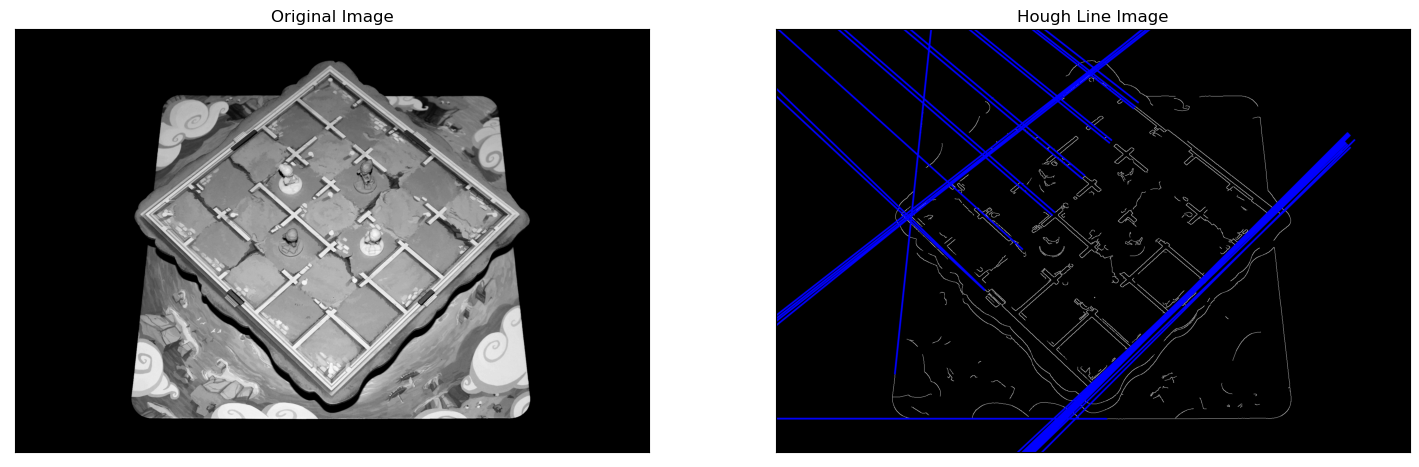

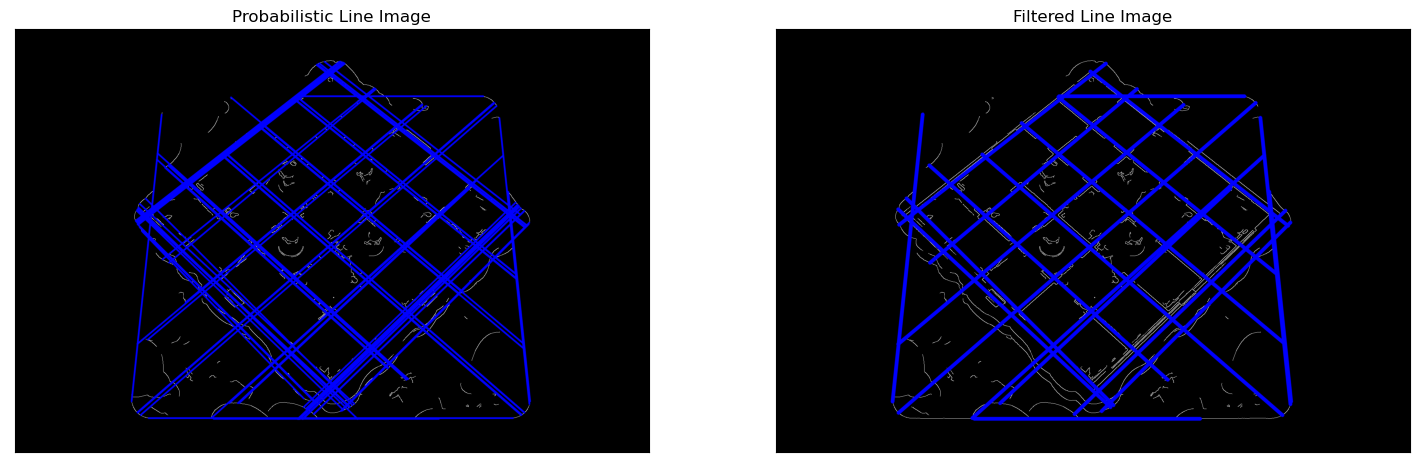

In [195]:
filteredLinesProb = cv.cvtColor(edges, cv.COLOR_GRAY2BGR)

if linesP is not None:
    for i in indexes:
        l = linesP[i][0]
        cv.line(filteredLinesProb, (l[0], l[1]), (l[2], l[3]), (0, 0, 255), 10, cv.LINE_AA)

plt.figure(figsize=(18,18))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(houghLines, cmap ='gray')
plt.title('Hough Line Image'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(18,18))
plt.subplot(223),plt.imshow(houghLinesProb, cmap ='gray')
plt.title('Probabilistic Line Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(filteredLinesProb, cmap ='gray')
plt.title('Filtered Line Image'), plt.xticks([]), plt.yticks([])
plt.show()